# Face API Sample

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.

face api는 인물 분석을 통해서 다양한 정보를 제공해 줍니다. Azure Portal에서 Face API를 먼저 생성하고 접속에 필요한 URL과 subscription key를 가져와서 보여 줍니다.관련된 라이브러리를 가져옵니다. request는 웹 통신을 위해서 가져오고 BytesIO, Image는 이미지를 처리하기 위해서 사용하고 있습니다. ImageDraw, ImageFont는 이미지 위에 선을 긋거나 글씨를 넣기 위해서 사용됩니다.

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

Subscription Key와 서비스의 주소를 설정합니다.

In [2]:
subscription_key = 'MY_ACCESS_KEY'

In [3]:
faceDetection_url = 'https://<my_computer_vision_resource_name>.cognitiveservices.azure.com/face/v1.0/detect'

분석에 사용할 이미지를 확인합니다.

In [4]:
image_url = 'http://www.antenna.co.kr/upload/releases/2021011318404340434a8.jpg'

In [5]:
img = Image.open(BytesIO(requests.get(image_url).content))

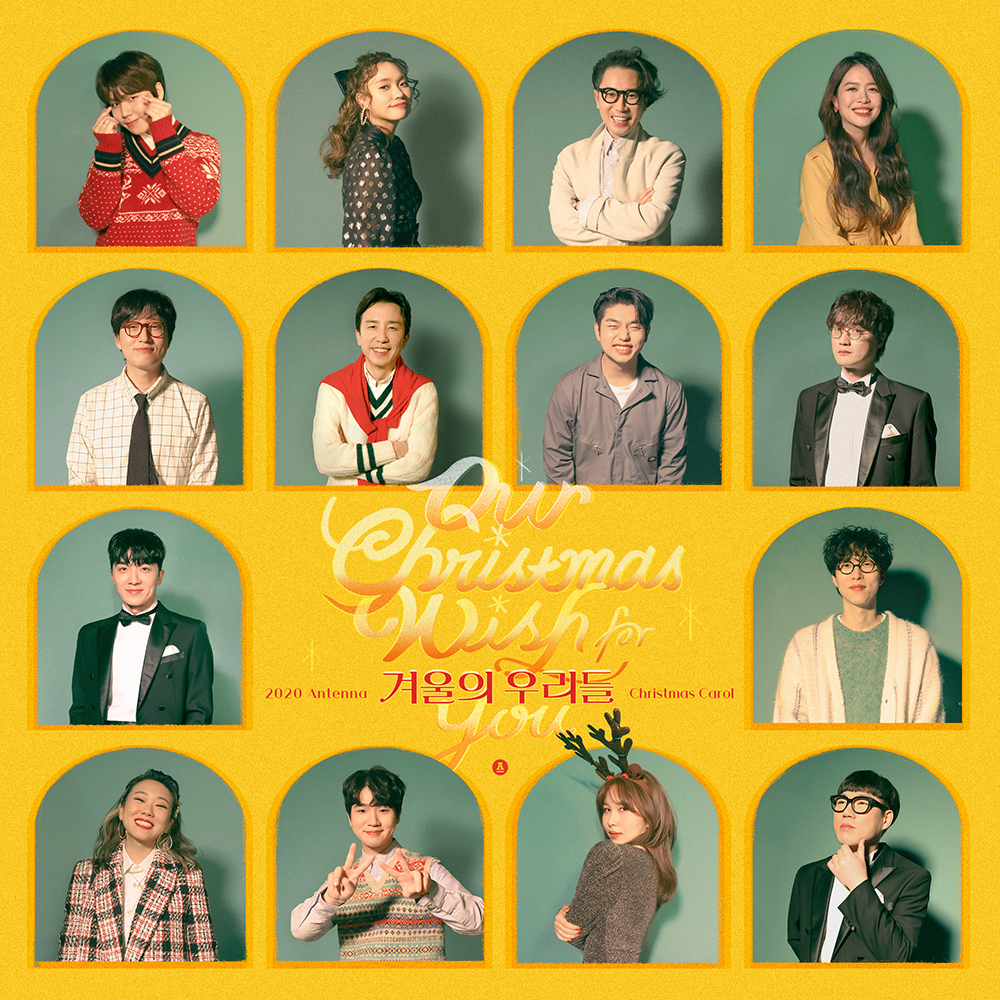

In [6]:
img

In [7]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params = {
    'returnFaceID': 'true',
    'returnFaceAttributes': 'age,gender,emotion'
}

In [8]:
data = {'url': image_url}

서비스를 호출해서 결과를 확인합니다.

In [9]:
response = requests.post(faceDetection_url,
                       headers=headers,
                       params=params,
                       json=data)

In [10]:
faces = response.json()

In [11]:
faces

[{'faceId': '607011e8-7732-419f-bf15-ef9f40946228',
  'faceRectangle': {'top': 313, 'left': 120, 'width': 49, 'height': 49},
  'faceAttributes': {'gender': 'male',
   'age': 33.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.092,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.252,
    'neutral': 0.653,
    'sadness': 0.002,
    'surprise': 0.0}}},
 {'faceId': '557df3c1-a03e-43be-a390-0cda77ef0d88',
  'faceRectangle': {'top': 788, 'left': 123, 'width': 48, 'height': 48},
  'faceAttributes': {'gender': 'female',
   'age': 26.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': 'f7889ec0-d53f-4043-ba3a-8d11c72a499e',
  'faceRectangle': {'top': 797, 'left': 589, 'width': 48, 'height': 48},
  'faceAttributes': {'gender': 'female',
   'age': 25.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness'

In [12]:
draw = ImageDraw.Draw(img)

In [13]:
for face in faces:
    
    rect = face['faceRectangle']
    
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left,top),(left+width,top+height)), outline='red')
    
    face_info = face['faceAttributes']
    emotion = face_info['emotion']
    happiness = emotion['happiness']
    gender = str(face_info['gender'])
    result = 'Gender:'+ gender + ' happiness:' + str(happiness*100)
    
    draw.text((left, top), result, fill='red')

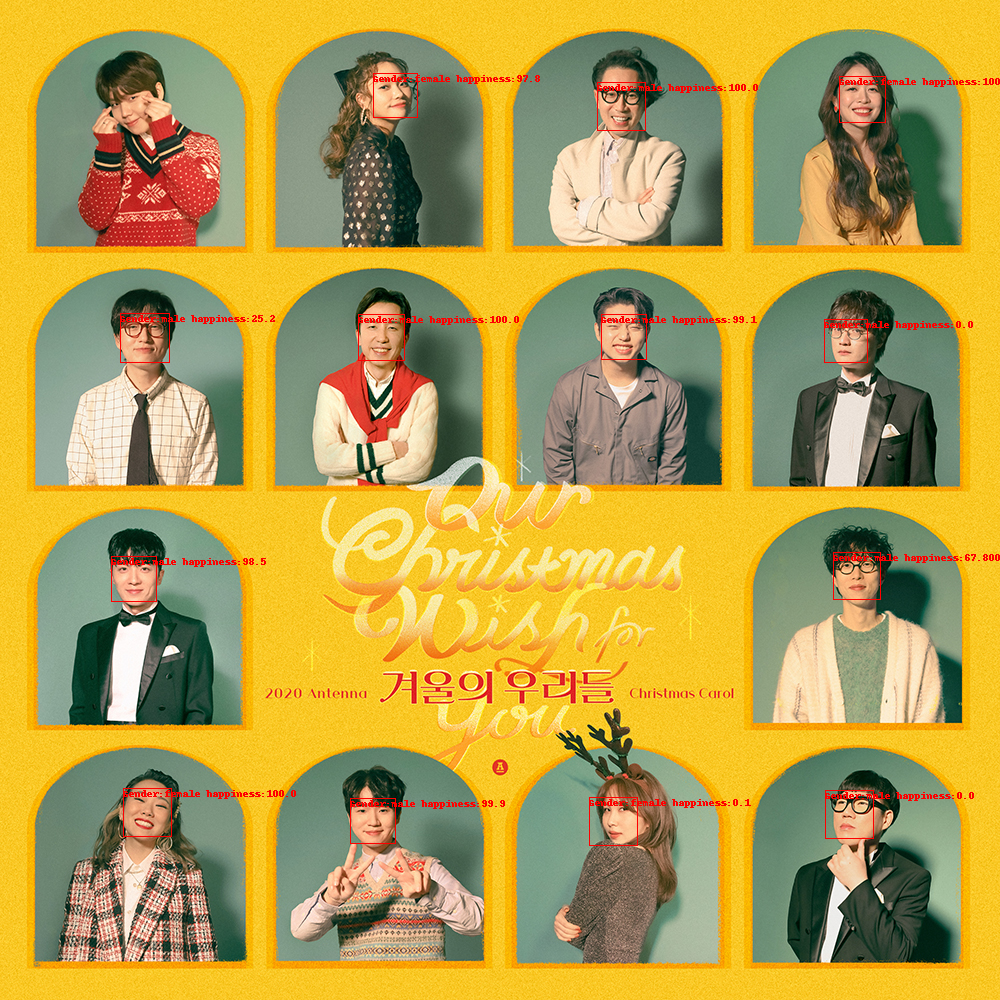

In [14]:
img